Marketing costs can range between 5% and  10% of revenue for  B2C companies. To reduce this spend companies use cross selling 
strategies to introduce complimentary products to their customer base. A good cross selling strategy not only lowers the 
marketing spend but also reduces churn. Giving price discounts,compensated by reduced marketing spend, on cross sales helps in 
improved customer loyalty and reduced churn. Insurance industry has huge benifits to be reaped from such a strategy. In-addition to cost benifit, customers will have one stop solution for all of their insurance needs, policy payments and claims experince.

Our client is an Insurance company that has provided Health Insurance to its customers now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

The project is divided into two phases. In the fist phase, we will explore the data for any quick insights and later we will develop machine learning model to produce probability of cross sale. With this model, the sales team can quickly rank their lead.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import squarify
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [8]:
df = pd.read_csv('./train.csv')

In [9]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [10]:
# Checking the data set for null or missing values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

From the above ouput , we can see that none of the columns have null values. This is good news because we need not spend any time null value treatment.

### Univariate Exploration

In The next few steps we will investiage distributionf of each variable and i'ts relation to the target variable 'Response'.

In [14]:
# Target variable
print("% of Customers buying cros-sells: {:.2f}".format(100*(df['Response'].mean())))

% of Customers buying cros-sells: 12.26


The odds of rejecting cross sell are 8 times higher. There is an imbalance in the target variable which requires special methods to make sure that the machine learning model is giving reasonable estimates.

#### Gender

In [15]:
df['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text yticklabel objects>)

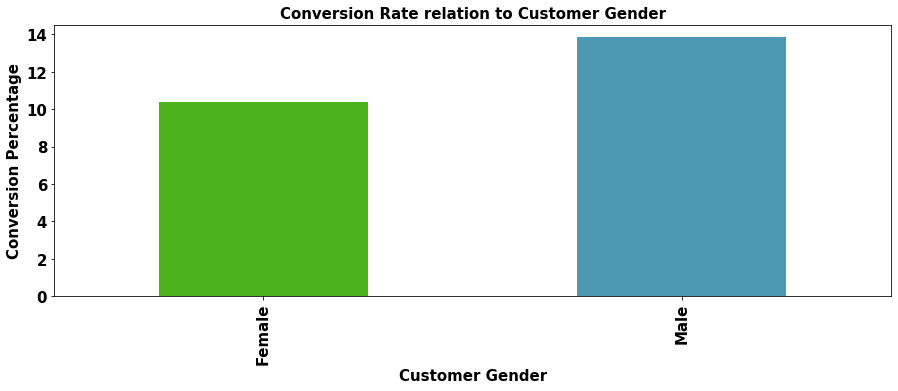

In [34]:
fig_gender = plt.figure(figsize=(15,5))
df.groupby('Gender')['Response'].mean().apply(lambda x : x*100).plot(kind='bar',color=[(0.3,0.7,0.1),(0.3,0.6,0.7)])
plt.xlabel('Customer Gender',fontsize=15, weight='bold')
plt.ylabel('Conversion Percentage',fontsize=15, weight='bold')
plt.title('Conversion Rate relation to Customer Gender',fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')

Male customers are showing higher conversion rate compared to Females. Also the population of male customers is higher in the 
percentage. 

Actions based on this insight: 
                               1) Acquiring more male customers, even with some discounts in the initial offering, will improve 
                                revenue.
                               2) Experiment with different ideas while selling to women. May be the current cross selling 
                                pitch is not working for this group.

#### Age

Text(0.5, 1.0, 'Age Profile of Customers')

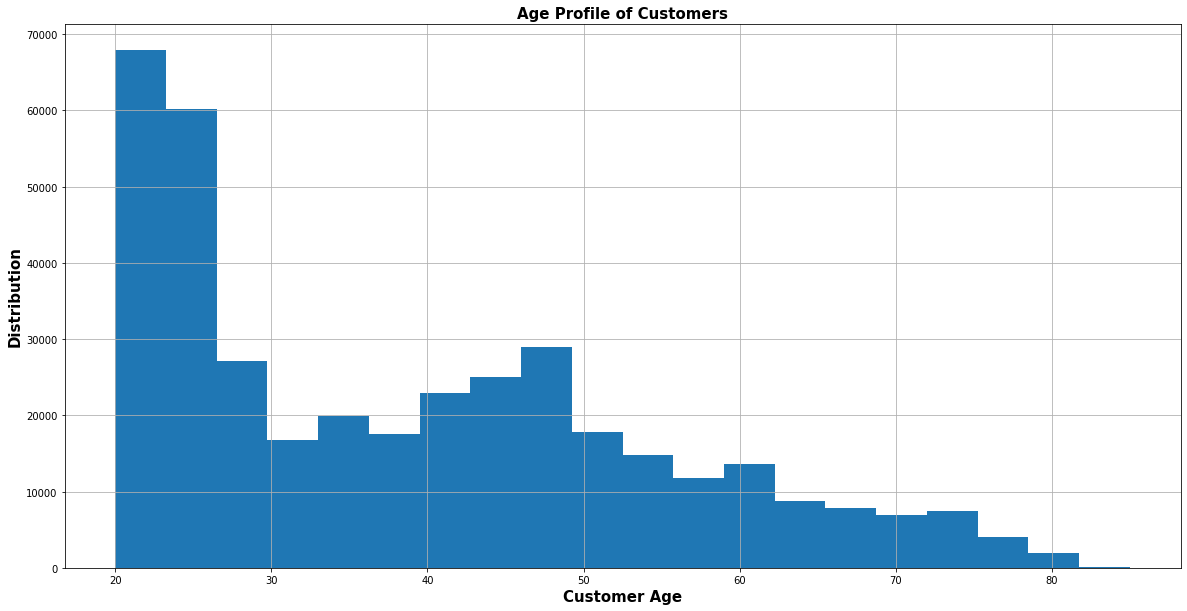

In [102]:
fig_age = plt.figure(figsize=(20,10))
df['Age'].hist(bins=20)
plt.xlabel('Customer Age',fontsize=15, weight='bold')
plt.ylabel('Distribution',fontsize=15, weight='bold')
plt.title('Age Profile of Customers',fontsize=15, weight='bold')

The distribution is has two modes 1) Younger population, between 20 and 30
                                  2) Older group with  mode at 48 years.
 To understand the relation between age and conversion rate, we shall divide into bins and plot the mean conversion rate.

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 <a list of 10 Text yticklabel objects>)

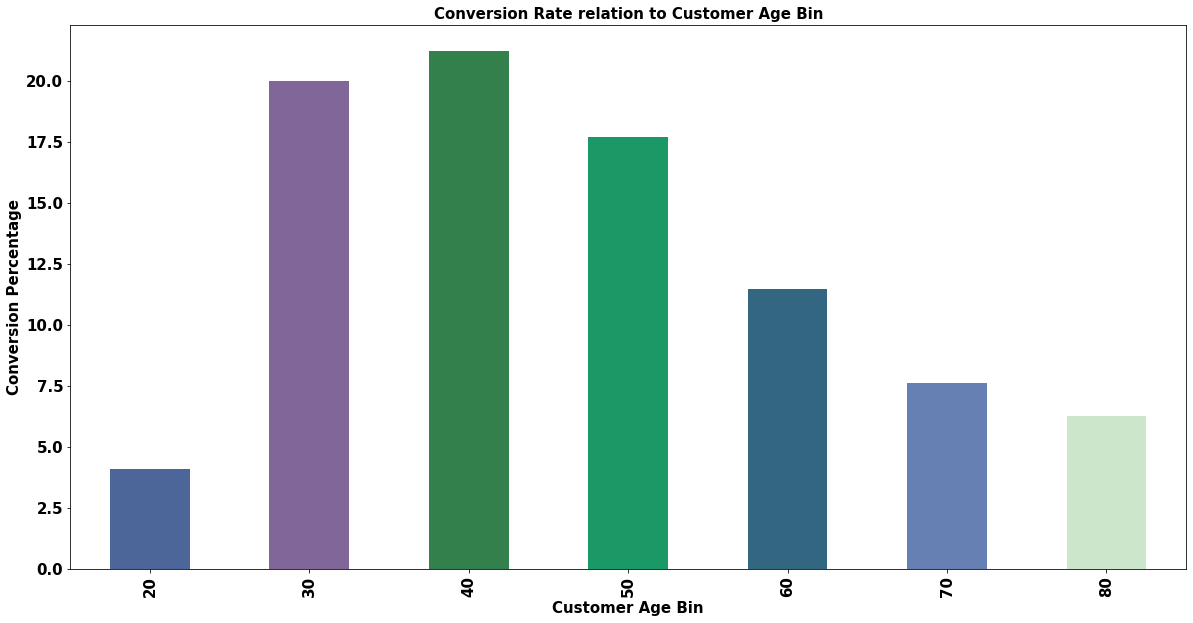

In [103]:
df['Age_Bins'] = (df['Age']//10)*10
fig_agebins = plt.figure(figsize=(20,10))
colors = [(0.3,0.4,0.6),(0.5,0.4,0.6),(0.2,0.5,0.3),(0.1,0.6,0.4),(0.2,0.4,0.5),(0.4,0.5,0.7),(0.8,0.9,0.8)]
df.groupby('Age_Bins')['Response'].mean().apply(lambda x : x*100).plot(kind='bar',color=colors)
plt.xlabel('Customer Age Bin',fontsize=15, weight='bold')
plt.ylabel('Conversion Percentage',fontsize=15, weight='bold')
plt.title('Conversion Rate relation to Customer Age Bin',fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')

Customers with age group 20 to 30 are significant portion of the customer base, but their response rate for cross selling is 
below average.

Action Item: Indepth study on requirements for this group. The insurance requirements of this group might be different from
other subpopulation. We need to consider this segment as a seperate group and design products matching to their requirement. 

### Drivers License

In [104]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text yticklabel objects>)

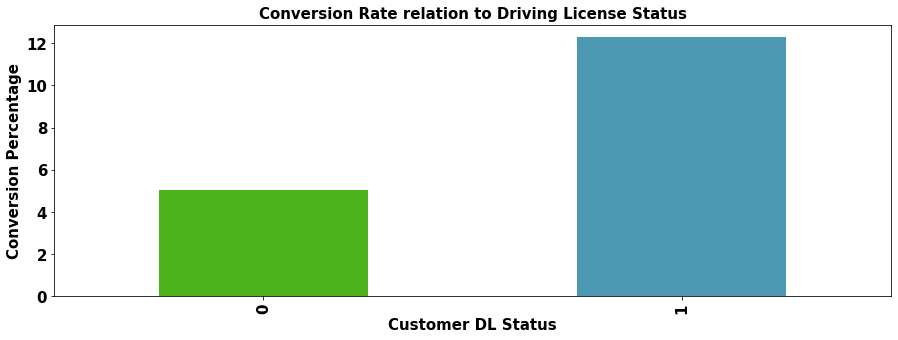

In [105]:
fig_dl = plt.figure(figsize=(15,5))
df.groupby('Driving_License')['Response'].mean().apply(lambda x : x*100).plot(kind='bar',color=[(0.3,0.7,0.1),(0.3,0.6,0.7)])
plt.xlabel('Customer DL Status',fontsize=15, weight='bold')
plt.ylabel('Conversion Percentage',fontsize=15, weight='bold')
plt.title('Conversion Rate relation to Driving License Status',fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')

Customers with out drivers license are not significant section of the customer base. In-addition they have very less cross sell
conversion. The customers with drivers license have same conversion rate as the over all populations. Segmentation on this columnis not very significant compared to others.

#### Region Code

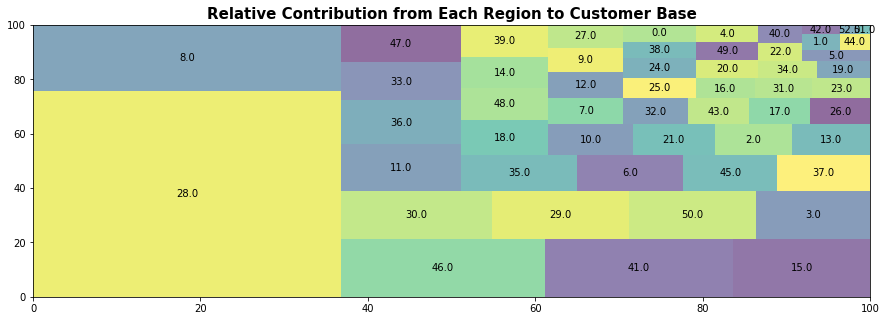

In [106]:
fig_dl = plt.figure(figsize=(15,5))
S_Regions = df['Region_Code'].value_counts()
sizes = list(S_Regions.values)
label = list(S_Regions.index)
squarify.plot(sizes=sizes, label=label, alpha=0.6)
plt.title('Relative Contribution from Each Region to Customer Base',fontsize=15, weight='bold')
plt.show()

This column is categorical but numerical values are used to represent different regions. 
Also, the number of categories are very high. To deal with this high number, we will divide the regions into groups based on 
conversion rate.

In [107]:
S_Comparative_Conversion = df.groupby('Region_Code')['Response'].mean().sort_values()*100/df['Response'].mean()
S_Comparative_Conversion = (S_Comparative_Conversion//25)*25
df_Comparative_Conversion = pd.DataFrame(S_Comparative_Conversion)
df_Comparative_Conversion.reset_index(inplace=True)
df_Comparative_Conversion.rename(columns={"Response":"Response_Bin"},inplace=True)
dict_Region_Code_Bin = dict(zip(list(df_Comparative_Conversion['Region_Code']),\
                                list(df_Comparative_Conversion['Response_Bin'])))

In [108]:
df['Region_Response_Bin'] = df['Region_Code'].map(dict_Region_Code_Bin)

#### Policy Sales Channel

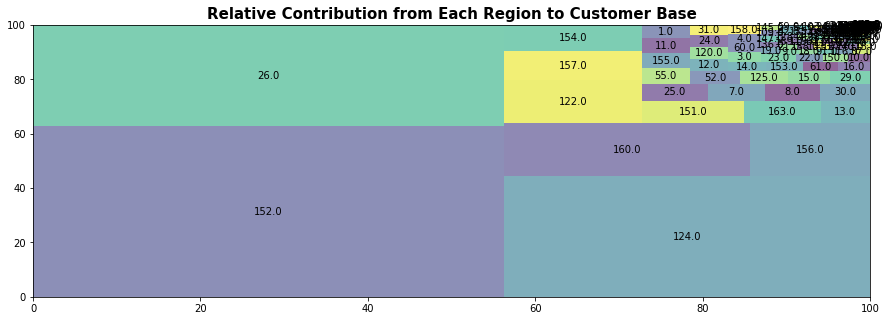

In [109]:
fig_sc = plt.figure(figsize=(15,5))
S_sales_channel = df['Policy_Sales_Channel'].value_counts()
sizes = list(S_sales_channel.values)
label = list(S_sales_channel.index)
squarify.plot(sizes=sizes, label=label, alpha=0.6)
plt.title('Relative Contribution from Each Region to Customer Base',fontsize=15, weight='bold')
plt.show()

Sales Channel 152, 26 and 124 are contributing to the bulk of customer base.

In [110]:
S_Comparative_Conversion = df.groupby('Policy_Sales_Channel')['Response'].mean().sort_values()*100/df['Response'].mean()
S_Comparative_Conversion = (S_Comparative_Conversion//25)*25
df_Comparative_Conversion = pd.DataFrame(S_Comparative_Conversion)
df_Comparative_Conversion.reset_index(inplace=True)
df_Comparative_Conversion.rename(columns={"Response":"Response_Bin"},inplace=True)
dict_Region_Code_Bin = dict(zip(list(df_Comparative_Conversion['Policy_Sales_Channel']),\
                                list(df_Comparative_Conversion['Response_Bin'])))

In [111]:
df['Sales_Channel_Response_Bin'] = df['Policy_Sales_Channel'].map(dict_Region_Code_Bin)

**Previously Insured**

In [112]:
df['Previously_Insured'].value_counts()/df['Previously_Insured'].value_counts().sum()

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

(array([ 0.,  5., 10., 15., 20., 25.]), <a list of 6 Text yticklabel objects>)

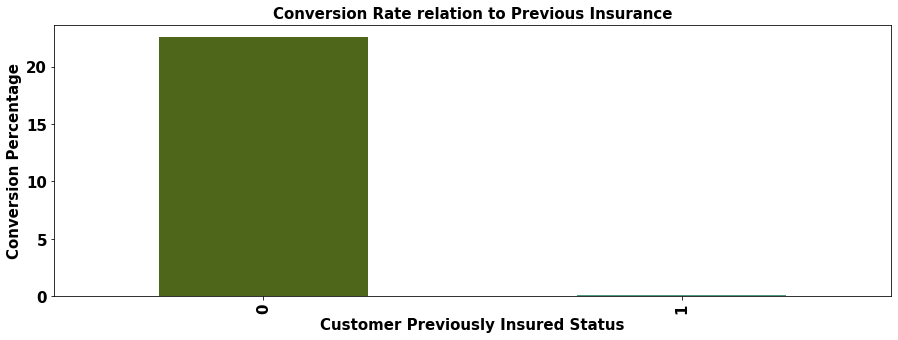

In [113]:
fig_pi = plt.figure(figsize=(15,5))
df.groupby('Previously_Insured')['Response'].mean().apply(lambda x : x*100).plot(kind='bar',color=[(0.3,0.4,0.1),(0.3,0.6,0.5)])
plt.xlabel('Customer Previously Insured Status',fontsize=15, weight='bold')
plt.ylabel('Conversion Percentage',fontsize=15, weight='bold')
plt.title('Conversion Rate relation to Previous Insurance',fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')

This is a significant Insight. Customers with previous insurance are less likely to respond favourably to cross sell offer.
Also this group is group is 45 % of the customer base. Sales team efforts are better spent on customers with no prior insurance.

### Vehicle Age

In [114]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text yticklabel objects>)

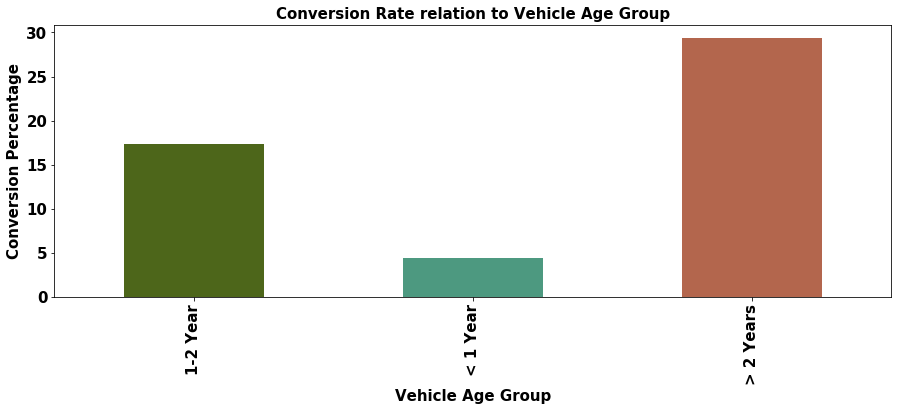

In [115]:
fig_va = plt.figure(figsize=(15,5))
df.groupby('Vehicle_Age')['Response'].mean().apply(lambda x : x*100).plot(kind='bar',color=[(0.3,0.4,0.1),(0.3,0.6,0.5),\
                                                                                            (0.7,0.4,0.3)])
plt.xlabel('Vehicle Age Group',fontsize=15, weight='bold')
plt.ylabel('Conversion Percentage',fontsize=15, weight='bold')
plt.title('Conversion Rate relation to Vehicle Age Group',fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')

Insight: Conversion rate ranking
    Vehicle_Age < 1 year
    Vehicle_Age  between 1 & 2 years
    Vehicle_Age greater than 2 years
As the vehivle age is increaing the likelihood of buying a new product is increasing.

### Vehicle Damage

In [116]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

(array([ 0.,  5., 10., 15., 20., 25.]), <a list of 6 Text yticklabel objects>)

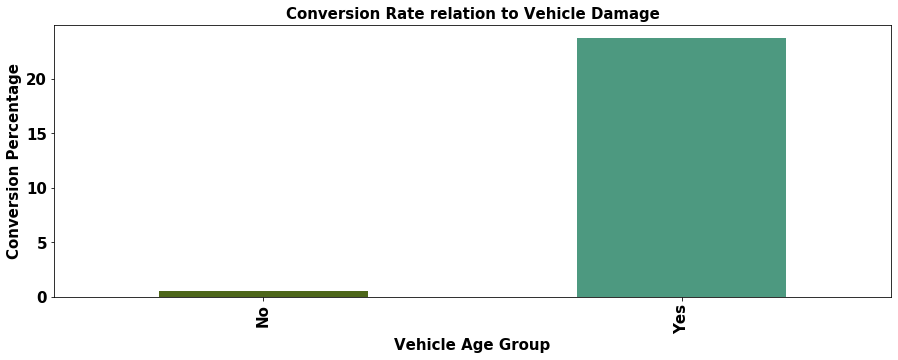

In [117]:
fig_va = plt.figure(figsize=(15,5))
df.groupby('Vehicle_Damage')['Response'].mean().apply(lambda x : x*100).plot(kind='bar',color=[(0.3,0.4,0.1),(0.3,0.6,0.5)])
plt.xlabel('Vehicle Age Group',fontsize=15, weight='bold')
plt.ylabel('Conversion Percentage',fontsize=15, weight='bold')
plt.title('Conversion Rate relation to Vehicle Damage',fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')

Insight: Customers with No vehicle Damage are have significantly less conversion rate compared to the other group.

### Annual Premium

Text(0.5, 1.0, 'Annual Premium Profile of Customers')

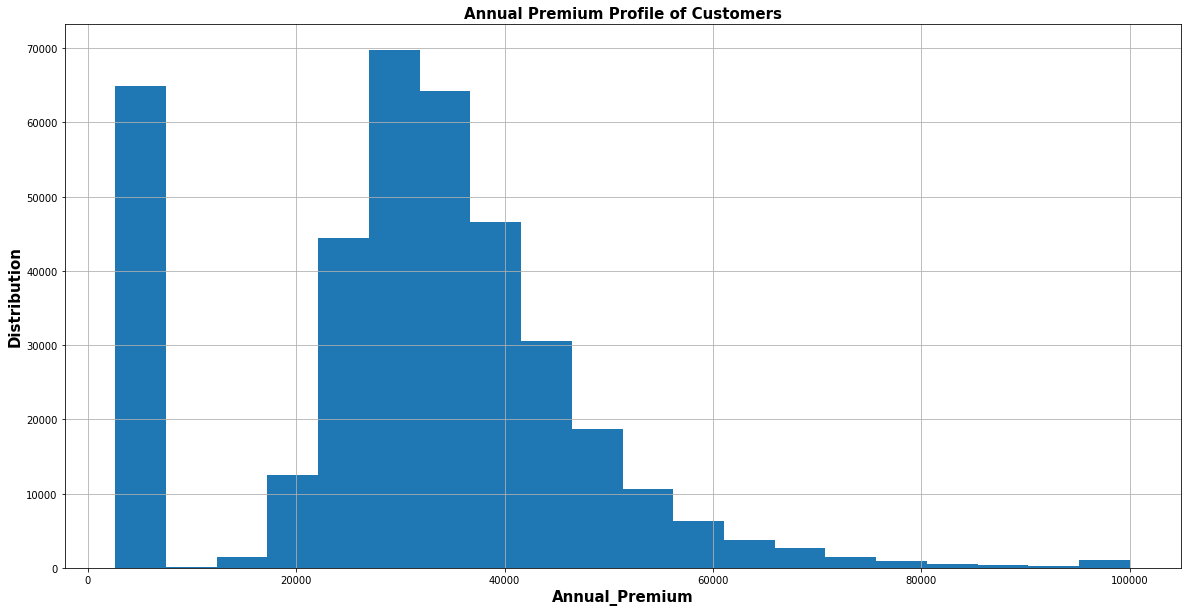

In [118]:
fig_anual_premium = plt.figure(figsize=(20,10))
df['Annual_Premium'][df['Annual_Premium']>100000]=100000
df['Annual_Premium'].hist(bins=20)
plt.xlabel('Annual_Premium',fontsize=15, weight='bold')
plt.ylabel('Distribution',fontsize=15, weight='bold')
plt.title('Annual Premium Profile of Customers',fontsize=15, weight='bold')

This distribution shows one group with premium value 2630. This premium might represent one insurance product.
To analyse the impact of premium on conversion rate,we will bin the premium and achieve the average conversion rate across these bins.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 10 Text yticklabel objects>)

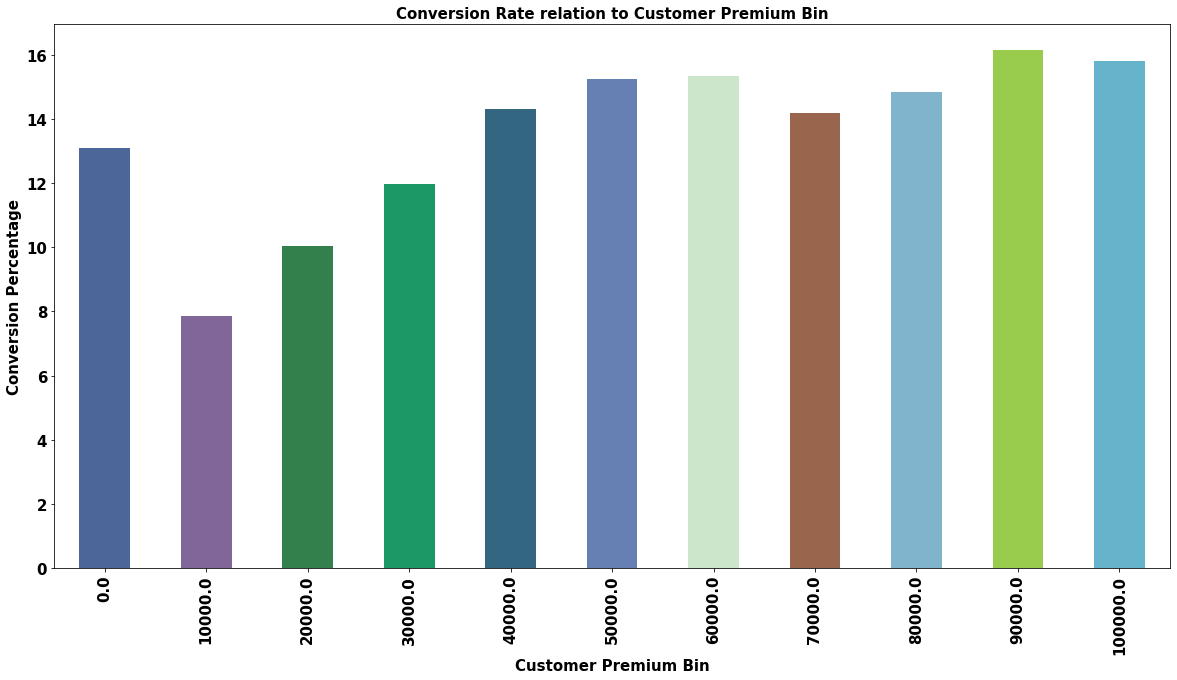

In [119]:
df['Annual_Premium_Bins'] = (df['Annual_Premium']//10000)*10000
fig_agebins = plt.figure(figsize=(20,10))
colors = [(0.3,0.4,0.6),(0.5,0.4,0.6),(0.2,0.5,0.3),(0.1,0.6,0.4),(0.2,0.4,0.5),(0.4,0.5,0.7),(0.8,0.9,0.8),
         (0.6,0.4,0.3),(0.5,0.7,0.8),(0.6,0.8,0.3),(0.4,0.7,0.8)]
df.groupby('Annual_Premium_Bins')['Response'].mean().apply(lambda x : x*100).plot(kind='bar',color=colors)
plt.xlabel('Customer Premium Bin',fontsize=15, weight='bold')
plt.ylabel('Conversion Percentage',fontsize=15, weight='bold')
plt.title('Conversion Rate relation to Customer Premium Bin',fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')

Annual premium amount has impact response rate but the differentiation is not as clear as the other variables.

### Vintage

Text(0.5, 1.0, 'Vintage Profile Distribution')

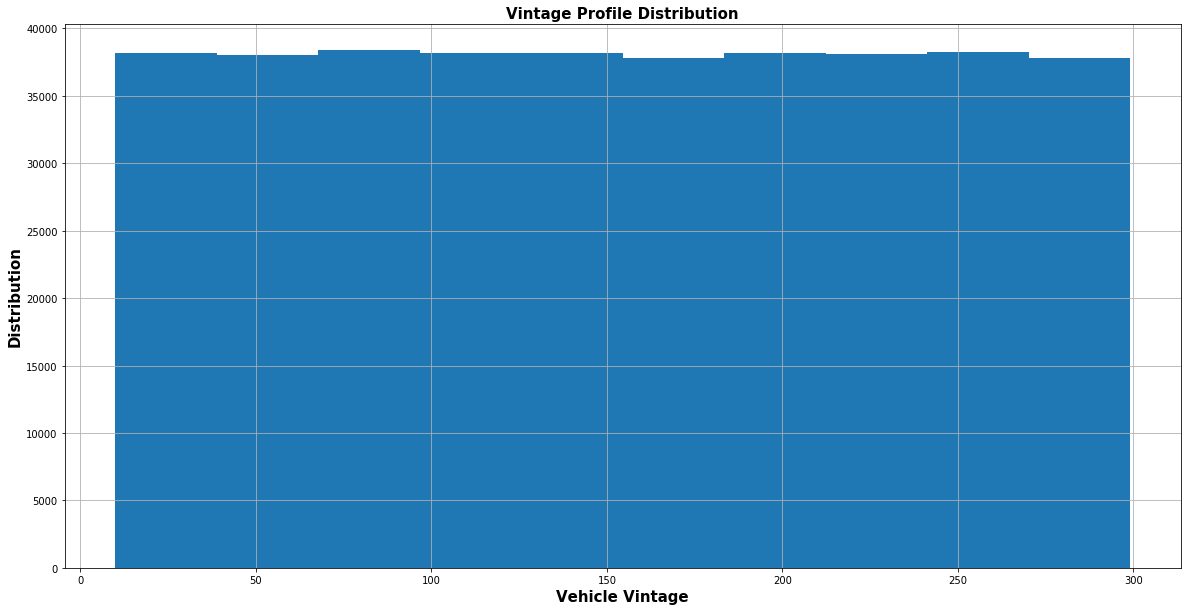

In [120]:
fig_vintage = plt.figure(figsize=(20,10))
df['Vintage'].hist(bins=10)
plt.xlabel('Vehicle Vintage',fontsize=15, weight='bold')
plt.ylabel('Distribution',fontsize=15, weight='bold')
plt.title('Vintage Profile Distribution',fontsize=15, weight='bold')

Vehicle vintage is not normally distributed and suprisingly it is uniform. Similar to  Age and Premium, we will bin this 
variable to understand impact on response

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text yticklabel objects>)

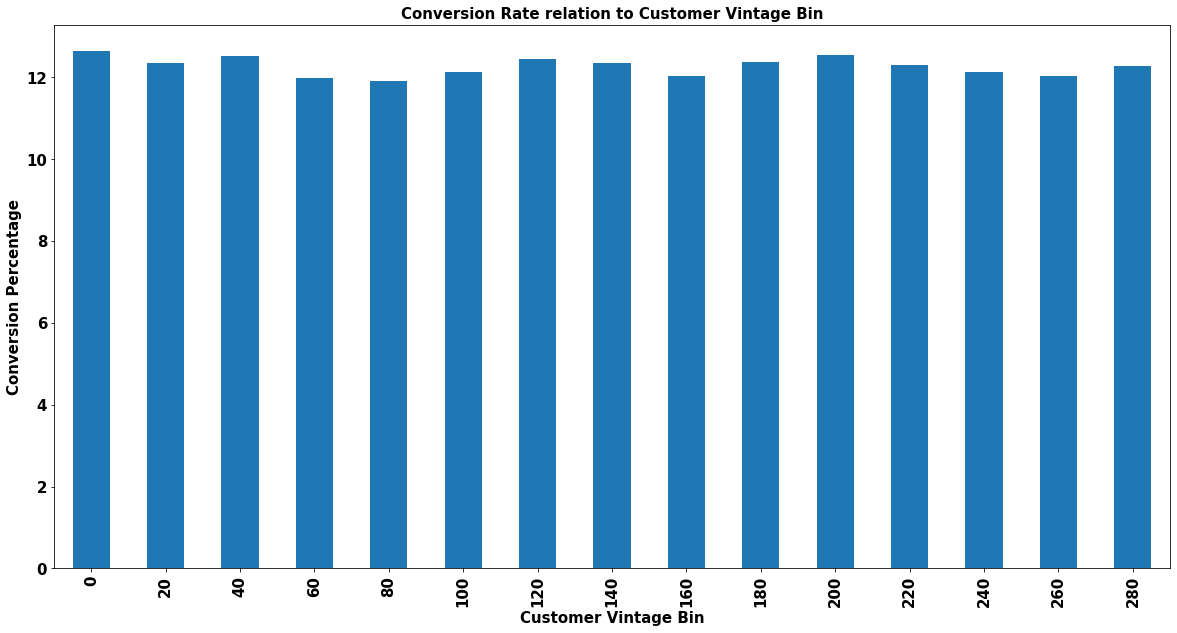

In [121]:
df['Vintage_Bins'] = (df['Vintage']//20)*20
fig_agebins = plt.figure(figsize=(20,10))
# colors = [(0.3,0.4,0.6),(0.5,0.4,0.6),(0.2,0.5,0.3),(0.1,0.6,0.4),(0.2,0.4,0.5),(0.4,0.5,0.7),(0.8,0.9,0.8),
#          (0.6,0.4,0.3),(0.5,0.7,0.8),(0.6,0.8,0.3),(0.4,0.7,0.8)]
df.groupby('Vintage_Bins')['Response'].mean().apply(lambda x : x*100).plot(kind='bar')
plt.xlabel('Customer Vintage Bin',fontsize=15, weight='bold')
plt.ylabel('Conversion Percentage',fontsize=15, weight='bold')
plt.title('Conversion Rate relation to Customer Vintage Bin',fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')

Similar to premium , vintage doesn't have significant impact on cross sell.

Summary:
    
    1) Insurance Premium, vintage doesn't exhibit string relation to cross sell.
    
    2) Customers with vehicle damage are responding favourably. This is understandable, drivers with accidents are more 
    likely to switch to new providers.
    
    3) Customers with older vechicles are responsing more favourably.
    
    4) Customers without no previous insurance are responding more favourably.
    
    5) Customers with age between 20 and 30 are least interested in buying vehicle insurance.
    
    6) Male customers are more favourably responding to cross sell offer.